In [8]:
pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

df = pd.read_excel("HousePricePrediction.xlsx")
print(df.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [11]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [32]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [14]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [23]:
missing_cols = df.columns[df.isnull().any()]
df[missing_cols] = df[missing_cols].fillna(df[missing_cols].mode().iloc[0])
print(df[missing_cols].isnull().sum())

MSZoning       0
Exterior1st    0
BsmtFinSF2     0
TotalBsmtSF    0
SalePrice      0
dtype: int64


In [ ]:
# # Lấy danh sách các cột có missing data
# missing_cols = df.columns[df.isnull().any()]
#
# print("Các cột có missing data:", list(missing_cols))
#
# # Ví dụ 1: Điền mean cho tất cả các cột số
# df[missing_cols] = df[missing_cols].fillna(df[missing_cols].mean())
#
# # Ví dụ 2: Nếu muốn điền median thay vì mean
# # df[missing_cols] = df[missing_cols].fillna(df[missing_cols].median())
#
# # Ví dụ 3: Nếu muốn điền mode (giá trị xuất hiện nhiều nhất)
# # mode_values = df[missing_cols].mode().iloc[0]
# # df[missing_cols] = df[missing_cols].fillna(mode_values)
#
# # Ví dụ 4: Điền bằng một giá trị cố định (vd: 0 hoặc "Unknown")
# # df[missing_cols] = df[missing_cols].fillna(0)

In [24]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric feature: {numeric_cols}")

Numeric feature: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


In [25]:
# Lưu các feature có outlier
outlier_features = []

# Kiểm tra từng cột số
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nếu có outlier thì thêm vào list
    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        outlier_features.append(col)

print("Features has oulier:", outlier_features)

Features has oulier: ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


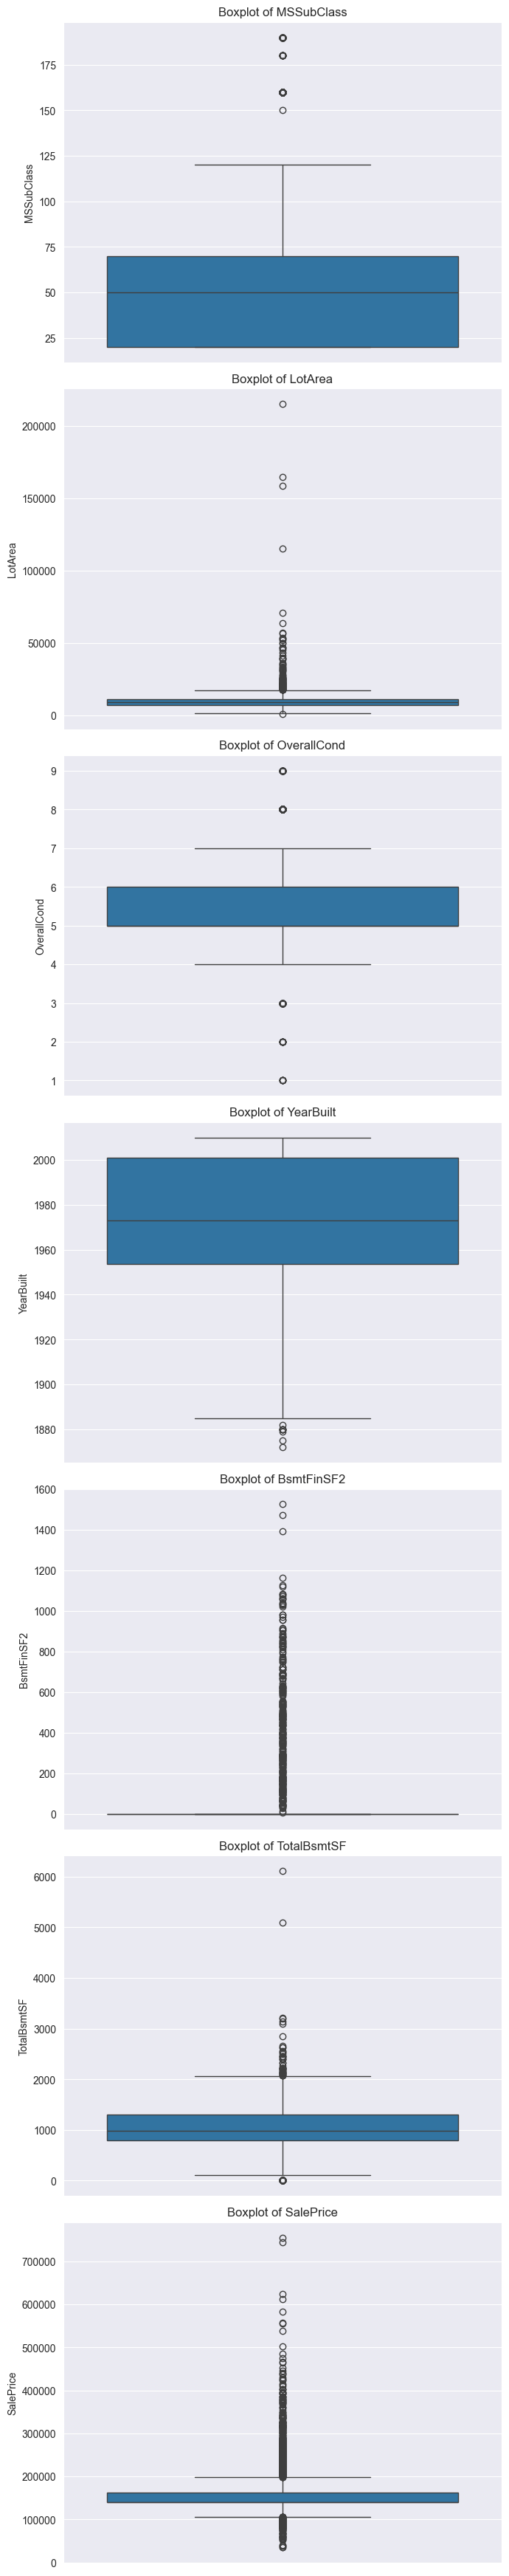

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho các feature có outlier
if outlier_features:
    plt.figure(figsize=(7, 5 * len(outlier_features)))
    for i, col in enumerate(outlier_features, 1):
        plt.subplot(len(outlier_features), 1, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No features have outliers.")

In [28]:
# Xử lý outlier: thay thế bằng giới hạn
for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Thay thế giá trị < lower bằng lower, > upper bằng upper
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound
                            else (upper_bound if x > upper_bound else x))

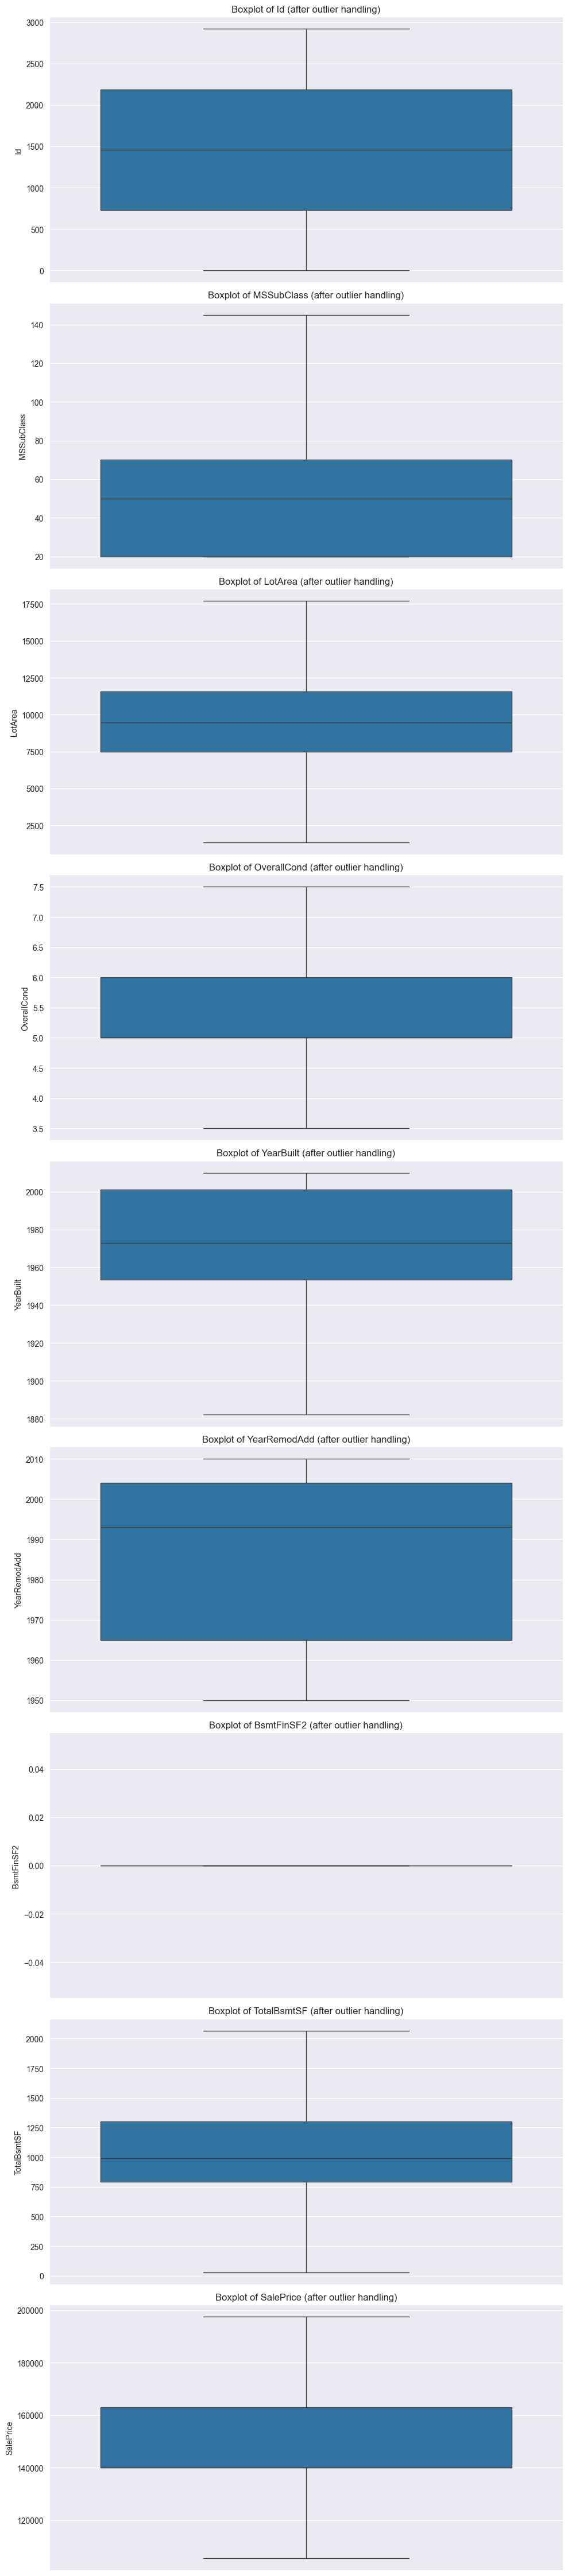

In [29]:
plt.figure(figsize=(10, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} (after outlier handling)")

plt.tight_layout()
plt.show()

In [31]:
# Kiểm tra có hàng trùng lặp không
print("Duplicated rows or not?:", df.duplicated().any())

# Đếm số hàng trùng lặp
print("Number of duplicated rows:", df.duplicated().sum())

# Hiển thị các hàng bị trùng
duplicates = df[df.duplicated()]
print("Duplicated rows:")
print(duplicates)

Duplicated rows or not?: False
Number of duplicated rows: 0
Duplicated rows:
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, Exterior1st, BsmtFinSF2, TotalBsmtSF, SalePrice]
Index: []


In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 4. Encode categorical features (Label Encoding)
label_encoders = {}
for col in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Chuẩn hóa dữ liệu numeric (optional, nhưng nên làm cho mô hình linear)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop("SalePrice")  # loại target
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Dữ liệu đã sẵn sàng để train/test split
print("\nDữ liệu sau khi tiền xử lý:")
print(df.head())


Dữ liệu sau khi tiền xử lý:
         Id  MSSubClass  MSZoning   LotArea  LotConfig  BldgType  OverallCond  \
0 -1.731458    0.123492         3 -0.311935          4         0    -0.564956   
1 -1.730271   -0.935170         3  0.006504          2         0     2.057670   
2 -1.729084    0.123492         3  0.463393          4         0    -0.564956   
3 -1.727897    0.388158         3 -0.007341          0         0    -0.564956   
4 -1.726711    0.123492         3  1.296871          2         0    -0.564956   

   YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0   1.047055      0.896833           12         0.0    -0.463145   197500.0  
1   0.154571     -0.395604            8         0.0     0.531326   181500.0  
2   0.980945      0.848965           12         0.0    -0.306381   197500.0  
3  -1.861782     -0.682812           13         0.0    -0.708089   140000.0  
4   0.947890      0.753229           12         0.0     0.244742   197500.0  


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tách Features (X) và Target (y)
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Chia train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Huấn luyện mô hình Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Kết quả đánh giá mô hình:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

📊 Kết quả đánh giá mô hình:
MAE : 5217.882482876713
RMSE: 10868.990706246735
R²  : 0.8340091290687512
